In [ ]:
import pandas as pd
import numpy as np
import json
from glob import glob
import warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
import matplotlib.patches as mpatches
import torch
import torch.nn as nn

from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, balanced_accuracy_score, matthews_corrcoef
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
from transformers import AdamW, get_linear_schedule_with_warmup
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from collections import Counter
from tqdm import tqdm
from scipy.stats import pearsonr
import statsmodels.api as sm
from gensim.models import Word2Vec
# LDA using gensim: trigrams
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

### Dictionary

In [ ]:
dict1 = {
  "Anxiety": ["anxiety", "panic", "fear", "uneasy", "nervous", "pray", "apprehensive", "dread","restless", "on edge", "worried", "tense","covid", "covid19",
             "afraid", "alarm", "anxi", "apprehens", "avoid", "confus", "desperat", "discomfort", "distract", "distraught", "disturb", "doubt", "dwell",
              "fear", "fearful", "fearing", "fears", "frantic", "fright", "panic", "pressur", "reluctan", "scare", "scaring", "scary",
              "shake", "shaky", "shaki", "startl", "strain", "stress", "struggl", "stunned", "suspicio", "tensing", "tension", "terrified", "terrifies",
              "terrify", "terrifying", "terror", "uncertai", "uneas", "unsure", "uptight", "vulnerab", "worr"],
  "Depression": ["depression", "hopelessness", "despair", "despondent", "worthless", "sadness", "gloom", "lethargic","helpless",
                 "guilty", "empty", "tearful", "isolated","anguish", "ashamed", "aversi", "awkward", "craz", "distress", "emotional",
                 "guilt", "hesita", "horr", "humiliat", "inadequa", "indecis", "inhib", "insecur", "irrational", "miser", "neurotic", "obsess",
                 "overwhelm", "petrif", "phobi", "repress", "rigid", "risk", "shook", "shy", "sicken", "shame", "timid", "turmoil",
                 "uncertain", "uncomfortabl", "uncontrol", "upset", "grief"],
  "Isolation": ["isolation", "loneliness", "alone", "disconnected", "alienated", "excluded", "lonely", "bored", "confined", "unsociable"],
}


In [ ]:
stemmed_dict = {}
for key, words_list in dict1.items():
    stemmed_words = [stemmer.stem(word) for word in words_list]
    stemmed_dict[key] = stemmed_words

for key, words_list in stemmed_dict.items():
    print(key + ": " + str(words_list))

Anxiety: ['anxieti', 'panic', 'fear', 'uneasi', 'nervous', 'pray', 'apprehens', 'dread', 'restless', 'on edg', 'worri', 'tens', 'covid', 'covid19', 'afraid', 'alarm', 'anxi', 'apprehen', 'avoid', 'confus', 'desperat', 'discomfort', 'distract', 'distraught', 'disturb', 'doubt', 'dwell', 'fear', 'fear', 'fear', 'fear', 'frantic', 'fright', 'panic', 'pressur', 'reluctan', 'scare', 'scare', 'scari', 'shake', 'shaki', 'shaki', 'startl', 'strain', 'stress', 'struggl', 'stun', 'suspicio', 'tens', 'tension', 'terrifi', 'terrifi', 'terrifi', 'terrifi', 'terror', 'uncertai', 'unea', 'unsur', 'uptight', 'vulnerab', 'worr']
Depression: ['depress', 'hopeless', 'despair', 'despond', 'worthless', 'sad', 'gloom', 'letharg', 'helpless', 'guilti', 'empti', 'tear', 'isol', 'anguish', 'asham', 'aversi', 'awkward', 'craz', 'distress', 'emot', 'guilt', 'hesita', 'horr', 'humiliat', 'inadequa', 'indeci', 'inhib', 'insecur', 'irrat', 'miser', 'neurot', 'obsess', 'overwhelm', 'petrif', 'phobi', 'repress', 'rig

In [ ]:
dict1 = { #stemmed words
    "Anxiety": ['anxieti', 'panic', 'fear', 'uneasi', 'nervous', 'pray', 'apprehens', 'dread', 'restless', 'on edg', 'worri', 'tens', 'covid', 'covid19', 'afraid', 'alarm', 'anxi', 'apprehen', 'avoid', 'confus', 'desperat', 'discomfort', 'distract', 'distraught', 'disturb', 'doubt', 'dwell', "fear", "fearful", "fearing", "fears", "frantic", "fright", 'panic', 'pressur', 'reluctan', 'restless', 'scare', 'scare', 'scari', 'shake', 'shaki', 'shaki', 'startl', 'strain', 'stress', 'struggl', 'stun', 'suspicio', 'tens', 'tension', 'terrifi', "terrified", "terrifies", "terrify", "terrifying",'terror', 'uncertai', 'unea', 'unsur', 'uptight', 'vulnerab', 'worr'],
    "Depression": ['depress', 'hopeless', 'despair', 'despond', 'worthless', 'sad', 'gloom', 'letharg', 'helpless', 'guilti', 'empti', 'tear', 'anguish', 'asham', 'aversi', 'awkward', 'craz', 'distress', 'emot', 'guilt', 'hesita', 'horr', 'humiliat', 'inadequa', 'indeci', 'inhib', 'irrat', 'miser', 'neurot', 'obsess', 'overwhelm', 'petrif', 'phobi', 'repress', 'rigid', 'risk', 'shame', 'shook', 'shi', 'sicken', 'shame', 'timid', 'turmoil', 'uncertain', 'uncomfortabl', 'uncontrol', 'upset', 'grief'],
    "Isolation": ['isol', 'loneli', 'alon', 'disconnect', 'alien', 'exclud', 'lone', 'bore', 'confin', 'unsoci']
}

In [ ]:
addl = {
    "Recovery": ["recovery", "recovered", "improve", "better", "hopeful", "optimistic","healing", "well-being", "thriving", "coping", "resilient", "hopeful", "grateful","thankful"],
    "Financial": ["job loss", "unemployment", "financial hardship", "economic recession", "business closures","debt", "struggling", "insecure", "afford", "bills"],
    "Work": ["remote work", "work from home", "layoffs", "downsizing", "online learning", "virtual meetings", "workload", "burnout","productive", "unproductive", "busy", "flexible", "balance"]
}

addl_dict = {}
for key, words_list in addl.items():
    stemmed_words = [stemmer.stem(word) for word in words_list]
    addl_dict[key] = stemmed_words

for key, words_list in addl_dict.items():
    print(key + ": " + str(words_list))

Recovery: ['recoveri', 'recov', 'improv', 'better', 'hope', 'optimist', 'heal', 'well-b', 'thrive', 'cope', 'resili', 'hope', 'grate', 'thank']
Financial: ['job loss', 'unemploy', 'financial hardship', 'economic recess', 'business closur', 'debt', 'struggl', 'insecur', 'afford', 'bill']
Work: ['remote work', 'work from hom', 'layoff', 'downsiz', 'online learn', 'virtual meet', 'workload', 'burnout', 'product', 'unproduct', 'busi', 'flexibl', 'balanc']


In [ ]:
dict2 = { #for labeling
    "Anxiety": ['anxieti', 'panic', 'fear', 'uneasi','nervous', 'pray', 'apprehens', 'dread', 'restless', 'on edg', 'worri', 'tens', 'covid', 'covid19', 'afraid', 'alarm',
                'anxi', 'apprehen', 'avoid', 'confus', 'desperat', 'discomfort', 'distract', 'distraught', 'disturb', 'doubt', 'dwell', "fear", "fearful", "fearing", "fears", "frantic", "fright", 'panic', 'pressur', 'reluctan', 'restless', 'scare', 'scare', 'scari', 'shake', 'shaki', 'shaki', 'startl', 'strain', 'stress', 'stun', 'suspicio', 'tens', 'tension', 'terrifi', "terrified", "terrifies", "terrify", "terrifying",'terror', 'uncertai', 'unea', 'unsur', 'uptight', 'vulnerab', 'worr'],
    "Depression": ['depress', 'hopeless', 'despair', 'despond', 'worthless', 'sad', 'gloom', 'letharg', 'helpless', 'guilti', 'empti', 'tear', 'anguish', 'asham',
                   'aversi', 'awkward', 'craz', 'distress', 'emot', 'guilt', 'hesita', 'horr', 'humiliat', 'inadequa', 'indeci', 'inhib', 'irrat', 'miser', 'neurot', 'obsess', 'overwhelm', 'petrif', 'phobi', 'repress', 'rigid', 'risk', 'shame', 'shook', 'shi', 'sicken', 'shame', 'timid', 'turmoil', 'uncertain', 'uncomfortabl', 'uncontrol', 'upset', 'grief'],
    "Isolation": ['isol', 'loneli', 'alon', 'disconnect', 'alien', 'exclud', 'lone', 'bore', 'confin', 'unsoci'],
    "Recovery": ['recoveri', 'recov', 'improv', 'better', 'hope', 'optimist', 'heal', 'well-b', 'thrive', 'cope', 'resili', 'hope'],
    "Financial": ['job loss', 'unemploy', 'financial hardship', 'pay', 'pay-cuts', 'economic recess', 'business closur', 'debt', 'struggl', 'insecur', 'afford', 'bill'],
    "Work": ['remote work', 'work from hom', 'layoff', 'downsiz','online learn', 'virtual meet', 'workload', 'burnout', 'product', 'unproduct', 'busi', 'flexibl', 'balanc']
}

In [ ]:
lockdown_dict = {
    "Pre_Lockdown": [
        'anxiety', 'anxious', 'panic', 'fear', 'unease', 'nervousness', 'apprehension', 'dread', 'restlessness','worry', 'tension', 'afraid', 'alarmed', 'vigilant', 'avoidance', 'confusion', 'desperation', 'discomfort',
        'disturbed', 'doubtful', 'frantic', 'frightened', 'pressured', 'reluctance', 'scared', 'startled', 'stressed','struggling', 'stunned', 'suspicious', 'terrible', 'terrified', 'uncertain', 'uneasy', 'unsure', 'vulnerable',
        'worried', 'job loss', 'unemployment', 'financial hardship', 'economic recession', 'business closures'
    ],
    "During_Lockdown": [
        'depressed', 'hopelessness', 'sorrow', 'despair', 'despondency', 'worthlessness', 'sadness', 'gloomy','praying', 'lethargy', 'helpless', 'guilty', 'empty', 'tearful', 'isolated', 'anguished', 'ashamed',
        'averse', 'awkward', 'distressed', 'emotional pain', 'guilt', 'horrified', 'humiliated', 'inadequate','indecisive', 'inhibited', 'insecure', 'irrational', 'miserable', 'neurotic', 'obsessive', 'overwhelmed',
        'petrified', 'phobic', 'rigid', 'risky', 'shame', 'social withdrawal', 'sickened', 'timid', 'in turmoil','uncertainty', 'uncomfortable', 'uncontrollable', 'grief', 'remote working', 'layoff', 'salary cut',
        'downsizing', 'online learning', 'virtual meetings', 'increased workload', 'burnout', 'inefficient', 'busy','flexibility', 'work-life balance'
    ],
    "Post_Lockdown": [
        'recovering', 'improvement', 'betterment', 'hopeful', 'optimistic', 'healing', 'well-being', 'thriving','coping', 'resilient', 'adjustment', 'adapting', 'continued remote work', 'work from home transition',
        'persistent layoff concerns', 'ongoing downsizing', 'continual learning', 'virtual collaboration','remaining workload', 'sustain', 'productive again', 'unproductive feelings', 'remaining busy',
        'achieving flexibility', 'searching for balance'
    ]
}
l_dict = {}
for key, words_list in lockdown_dict.items():
    stemmed_words = [stemmer.stem(word) for word in words_list]
    l_dict[key] = stemmed_words

for key, words_list in l_dict.items():
    print(key + ": " + str(words_list))

Pre_Lockdown: ['anxieti', 'anxious', 'panic', 'fear', 'uneas', 'nervous', 'apprehens', 'dread', 'restless', 'worri', 'tension', 'afraid', 'alarm', 'vigil', 'avoid', 'confus', 'desper', 'discomfort', 'disturb', 'doubt', 'frantic', 'frighten', 'pressur', 'reluct', 'scare', 'startl', 'stress', 'struggl', 'stun', 'suspici', 'terribl', 'terrifi', 'uncertain', 'uneasi', 'unsur', 'vulner', 'worri', 'job loss', 'unemploy', 'financial hardship', 'economic recess', 'business closur']
During_Lockdown: ['depress', 'hopeless', 'sorrow', 'despair', 'despond', 'worthless', 'sad', 'gloomi', 'pray', 'lethargi', 'helpless', 'guilti', 'empti', 'tear', 'isol', 'anguish', 'asham', 'avers', 'awkward', 'distress', 'emotional pain', 'guilt', 'horrifi', 'humili', 'inadequ', 'indecis', 'inhibit', 'insecur', 'irrat', 'miser', 'neurot', 'obsess', 'overwhelm', 'petrifi', 'phobic', 'rigid', 'riski', 'shame', 'social withdraw', 'sicken', 'timid', 'in turmoil', 'uncertainti', 'uncomfort', 'uncontrol', 'grief', 'remot

In [ ]:
lockdown_dict = {
    "Pre_Lockdown": ['anxieti', 'anxious', 'panic', 'fear', 'uneas', 'nervous', 'apprehens', 'dread', 'restless', 'worri', 'tension', 'afraid', 'alarm', 'vigil', 'avoid', 'confus', 'desper', 'discomfort', 'disturb', 'doubt', 'frantic', 'frighten', 'pressur', 'reluct', 'scare', 'startl', 'stress', 'struggl', 'stun', 'suspici', 'terribl', 'terrifi', 'uncertain', 'uneasi', 'unsur', 'vulner', 'worri', 'job loss', 'unemploy', 'financial hardship', 'economic recess', 'business closur'],
    "During_Lockdown": ['depress', 'hopeless', 'sorrow', 'despair', 'despond', 'worthless', 'sad', 'gloomi', 'pray', 'lethargi', 'helpless', 'guilti', 'empti', 'tear', 'isol', 'anguish', 'asham', 'avers', 'awkward', 'distress', 'emotional pain', 'guilt', 'horrifi', 'humili', 'inadequ', 'indecis', 'inhibit', 'insecur', 'irrat', 'miser', 'neurot', 'obsess', 'overwhelm', 'petrifi', 'phobic', 'rigid', 'riski', 'shame', 'social withdraw', 'sicken', 'timid', 'in turmoil', 'uncertainti', 'uncomfort', 'uncontrol', 'grief', 'remote work', 'layoff', 'salary cut', 'downsiz', 'online learn', 'virtual meet', 'increased workload', 'burnout', 'ineffici', 'busi', 'flexibl', 'work-life bal'],
    "Post_Lockdown": ['recov', 'improv', 'better', 'hope', 'optimist', 'heal', 'well-b', 'thrive', 'cope', 'resili', 'adjust', 'adapt', 'continued remote work', 'work from home transit', 'persistent layoff concern', 'ongoing downs', 'continual learn', 'virtual collabor', 'remaining workload', 'sustain', 'productive again', 'unproductive feel', 'remaining busi', 'achieving flex', 'searching for bal']
}

In [ ]:
filtered_nj=pd.read_csv('final_data.csv')

In [ ]:
tfidf_vec_ngrams = TfidfVectorizer(ngram_range=(2, 3))
ngrams_vec = tfidf_vec_ngrams.fit_transform(filtered_nj['cleaned_text'])

In [ ]:
tfidf_vec_lemmatized = TfidfVectorizer(ngram_range=(2, 3))
ngrams_lemm_vec = tfidf_vec_lemmatized.fit_transform(filtered_nj['lemmatized_text'])

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_gramsvec = vectorizer.fit_transform(filtered_nj['cleaned_text'])

#### Visualizations

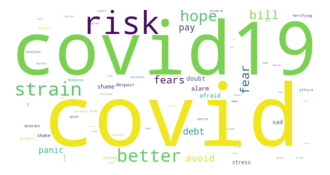

In [ ]:
word_freq = Counter(word for text in filtered_nj['cleaned_text'] for word_list in dict2.values() for word in text.split() if word in word_list)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(4, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

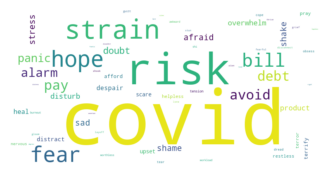

In [ ]:
word_freq = Counter(word for text in filtered_nj['lemmatized_text'] for word_list in dict2.values() for word in text.split() if word in word_list)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(4, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

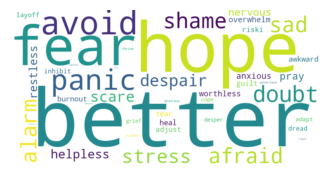

In [ ]:
word_freq = Counter(word for text in filtered_nj['cleaned_text'] for word_list in lockdown_dict.values() for word in text.split() if word in word_list)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(4, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
viz=filtered_nj.copy()

In [ ]:
viz_sorted = viz.sort_values(by='date')
viz=viz_sorted

In [ ]:
viz['date'] = pd.to_datetime(viz['date'])

In [ ]:
viz.set_index('date', inplace=True)

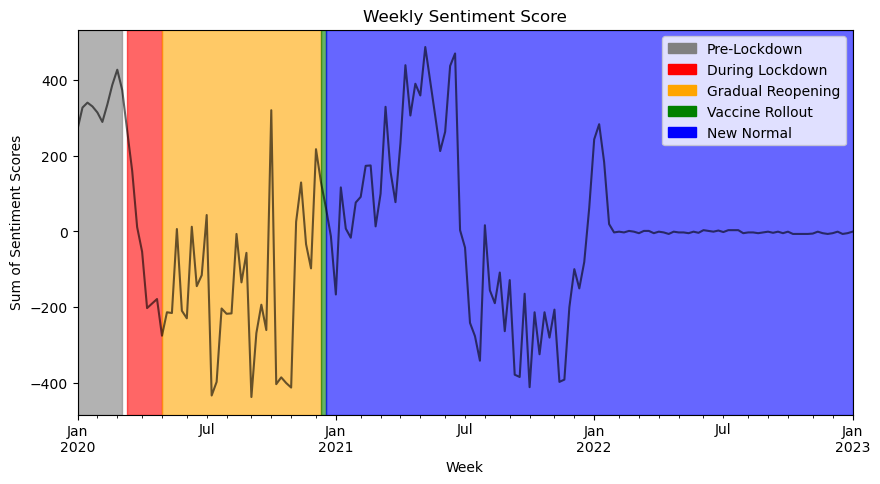

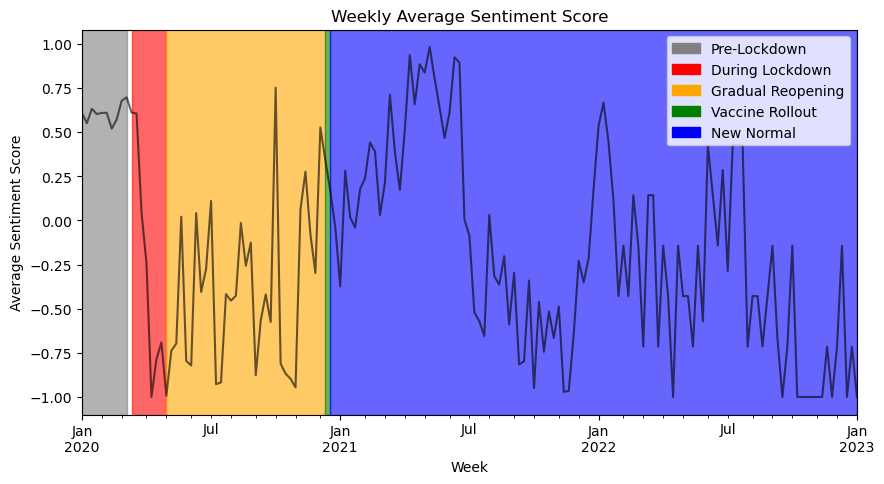

In [ ]:
weekly_sentiment = viz['sentiment_score'].resample('W').sum()
weekly_sentiment_mean = viz['sentiment_score'].resample('W').mean()

lockdown_periods = {
    'Pre-Lockdown': 'gray',
    'During Lockdown': 'red',
    'Gradual Reopening': 'orange',
    'Vaccine Rollout': 'green',
    'New Normal': 'blue'
}

plt.figure(figsize=(10, 5))
ax = weekly_sentiment.plot(color='black',alpha=0.6)
plt.title('Weekly Sentiment Score')
plt.xlabel('Week')
plt.ylabel('Sum of Sentiment Scores')

legend_patches = []
for period, color in lockdown_periods.items():
    period_data = viz[viz['lockdown_period'] == period]
    if not period_data.empty:
        start_date, end_date = viz[viz['lockdown_period'] == period].index.min(), viz[viz['lockdown_period'] == period].index.max()
        ax.axvspan(start_date, end_date, color=color, alpha=0.6)
        legend_patches.append(mpatches.Patch(color=color, label=period))

plt.legend(handles=legend_patches, loc='upper right')
plt.show()


plt.figure(figsize=(10, 5))
ax = weekly_sentiment_mean.plot(color='black',alpha=0.6)
plt.title('Weekly Average Sentiment Score')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')

legend_patches = []
for period, color in lockdown_periods.items():
    period_data = viz[viz['lockdown_period'] == period]
    if not period_data.empty:
        start_date, end_date = viz[viz['lockdown_period'] == period].index.min(), viz[viz['lockdown_period'] == period].index.max()
        ax.axvspan(start_date, end_date, color=color, alpha=0.6)
        legend_patches.append(mpatches.Patch(color=color, label=period))

plt.legend(handles=legend_patches, loc='upper right')
plt.show()


In [ ]:
viz=None

In [ ]:
filtered_nj.sentiment.value_counts()

sentiment
negative    24017
positive    22625
neutral       218
Name: count, dtype: int64

In [ ]:
filtered_nj.date.head(1)

0    2020-05-04 01:57:38
Name: date, dtype: object

### Correlation

In [ ]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', parse_dates=['date'])
covid_data=covid_data[covid_data.state=='New Jersey']
covid_data.date=pd.to_datetime(covid_data.date,format='%Y-%m-%d')

filtered_nj['date_date'] = pd.to_datetime(filtered_nj['date']).dt.date
filtered_nj['date_date'] = pd.to_datetime(filtered_nj['date_date'])

covid_data['date'] = pd.to_datetime(covid_data['date']).dt.date
covid_data.date=pd.to_datetime(covid_data.date)

covid_nj = pd.merge(filtered_nj, covid_data[['date', 'cases', 'deaths']], left_on='date_date', right_on='date', how='left')
covid_nj.cases.fillna(0,inplace=True)
covid_nj.deaths.fillna(0,inplace=True)
covid_nj.cases=covid_nj.cases.astype('int64')
covid_nj.deaths=covid_nj.deaths.astype('int64')


In [ ]:
correlation_cases = pearsonr(covid_nj['sentiment_score'], covid_nj['cases'])
correlation_deaths = pearsonr(covid_nj['sentiment_score'], covid_nj['deaths'])
print(f"Correlation between sentiment score and new cases: {correlation_cases}")
print(f"Correlation between sentiment score and new deaths: {correlation_deaths}")

lags = range(1, 15)
lagged_correlations = pd.DataFrame(index=lags, columns=['cases_corr', 'deaths_corr'])

Correlation between sentiment score and new cases: PearsonRResult(statistic=-0.01115414490687372, pvalue=0.015753904293032996)
Correlation between sentiment score and new deaths: PearsonRResult(statistic=-0.10672871256088819, pvalue=9.283036384584302e-119)


In [ ]:
for lag in lags:
    shifted_cases = covid_nj['cases'].shift(lag)
    shifted_deaths = covid_nj['deaths'].shift(lag)
    cases_corr = covid_nj['sentiment_score'].corr(shifted_cases)
    deaths_corr = covid_nj['sentiment_score'].corr(shifted_deaths)
    lagged_correlations.loc[lag, 'cases_corr'] = cases_corr
    lagged_correlations.loc[lag, 'deaths_corr'] = deaths_corr

print(lagged_correlations)

   cases_corr deaths_corr
1   -0.037045    -0.03674
2   -0.034704   -0.030965
3   -0.041397   -0.032773
4   -0.044872   -0.040478
5    -0.04972   -0.044858
6   -0.043748   -0.042743
7   -0.041531   -0.036989
8   -0.035889   -0.033866
9   -0.029001   -0.030073
10    -0.0311   -0.027471
11   -0.03556   -0.035055
12   -0.03131   -0.027462
13  -0.036132    -0.03118
14  -0.033124   -0.032128


### Topic Modeling

In [ ]:
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(filtered_nj['lemmatized_text'])

lda = LatentDirichletAllocation(n_components=5)
lda.fit(X)

filtered_nj['topic'] = lda.transform(X).argmax(axis=1)

In [ ]:
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-15 - 1:-1]]))
    print()

Topic 0:
coronavirus case death covid health positive test virus die new update lockdown infection help patient

Topic 1:
order food good place come like chicken great time try make restaurant really fry sauce

Topic 2:
coronavirus case death covid health positive die test virus update infection new vaccine mandate help

Topic 3:
coronavirus new covid school pandemic response test say reopen confirm home unemployment amp trump time

Topic 4:
coronavirus death say time case help told covid patient need work ask day new customer



### SMOTE

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

text_transformer = CountVectorizer(ngram_range=(2, 3))

lockdown_period_transformer = OneHotEncoder()

preprocess = ColumnTransformer(
    transformers=[
        ('text_bow', text_transformer, 'lemmatized_text'),
        ('lockdown_period_ohe', lockdown_period_transformer, ['lockdown_period'])
    ]
)

X_prepared = preprocess.fit_transform(filtered_nj[['lemmatized_text','lockdown_period']])
y_dt = filtered_nj['label_sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y_dt, test_size=0.2, random_state=1234)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_numeric)

### Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_smote, y_train_smote)

MultinomialNB()

In [ ]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')

              precision    recall  f1-score   support

     Anxiety       1.00      0.99      0.99      8176
  Depression       0.00      0.00      0.00        68
   Financial       0.43      0.06      0.10        52
   Isolation       0.00      0.00      0.00        14
    Recovery       0.48      0.10      0.17       127
        Work       0.21      0.06      0.09        83
     neutral       0.67      0.97      0.79       852

    accuracy                           0.95      9372
   macro avg       0.40      0.31      0.31      9372
weighted avg       0.94      0.95      0.94      9372

Precision: 0.943911283628918
Recall: 0.9523047375160051


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ngrams_vec, y_dt, test_size=0.2, random_state=1234)

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred))
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')

              precision    recall  f1-score   support

     Anxiety       0.88      1.00      0.93      8176
  Depression       0.00      0.00      0.00        68
   Financial       0.00      0.00      0.00        52
   Isolation       0.00      0.00      0.00        14
    Recovery       0.00      0.00      0.00       127
        Work       0.00      0.00      0.00        83
     neutral       0.32      0.03      0.05       852

    accuracy                           0.87      9372
   macro avg       0.17      0.15      0.14      9372
weighted avg       0.79      0.87      0.82      9372

Precision: 0.7941558350583235
Recall: 0.8725992317541613


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y_dt, test_size=0.2, random_state=1234)

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred))
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')

              precision    recall  f1-score   support

     Anxiety       1.00      0.99      0.99      8176
  Depression       0.00      0.00      0.00        68
   Financial       0.25      0.02      0.04        52
   Isolation       0.00      0.00      0.00        14
    Recovery       0.50      0.05      0.09       127
        Work       0.17      0.01      0.02        83
     neutral       0.67      0.99      0.80       852

    accuracy                           0.95      9372
   macro avg       0.37      0.29      0.28      9372
weighted avg       0.94      0.95      0.94      9372

Precision: 0.9426066323698172
Recall: 0.9530516431924883


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ngrams_lemm_vec, y_dt, test_size=0.2, random_state=1234)

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred))
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')

### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(ngrams_vec, filtered_nj['label_sentiment'])

accuracy = model.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.9560392658984208


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f'F1 Score (Weighted): {f1}')
print(f'Matthews Correlation Coefficient: {mcc}')
print(f'Balanced Accuracy Score: {balanced_accuracy}')

              precision    recall  f1-score   support

     Anxiety       1.00      0.99      0.99      8176
  Depression       0.18      0.07      0.10        68
   Financial       0.29      0.13      0.18        52
   Isolation       1.00      0.07      0.13        14
    Recovery       0.64      0.35      0.45       127
        Work       0.42      0.22      0.29        83
     neutral       0.74      0.93      0.82       852

    accuracy                           0.96      9372
   macro avg       0.61      0.39      0.42      9372
weighted avg       0.95      0.96      0.95      9372

F1 Score (Weighted): 0.951176875081633
Matthews Correlation Coefficient: 0.8119887121096178
Balanced Accuracy Score: 0.3944674188946677


In [ ]:
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')

Precision: 0.9519131697429616
Recall: 0.9560392658984208


In [ ]:
importances = model.feature_importances_

feature_names = tfidf_vec_ngrams.get_feature_names_out()

In [ ]:
indices = np.argsort(importances)[::-1]

for i in range(10):
    print(f"Feature: {feature_names[indices[i]]}, Importance: {importances[indices[i]]:.3f}")

Feature: new cases, Importance: 0.165
Feature: let alone, Importance: 0.081
Feature: weeks still get, Importance: 0.038
Feature: twice one best, Importance: 0.036
Feature: clean place delicious, Importance: 0.035
Feature: breads literally obsessed, Importance: 0.035
Feature: much better, Importance: 0.034
Feature: hours received food, Importance: 0.033
Feature: service improved 20000, Importance: 0.033
Feature: small park, Importance: 0.032


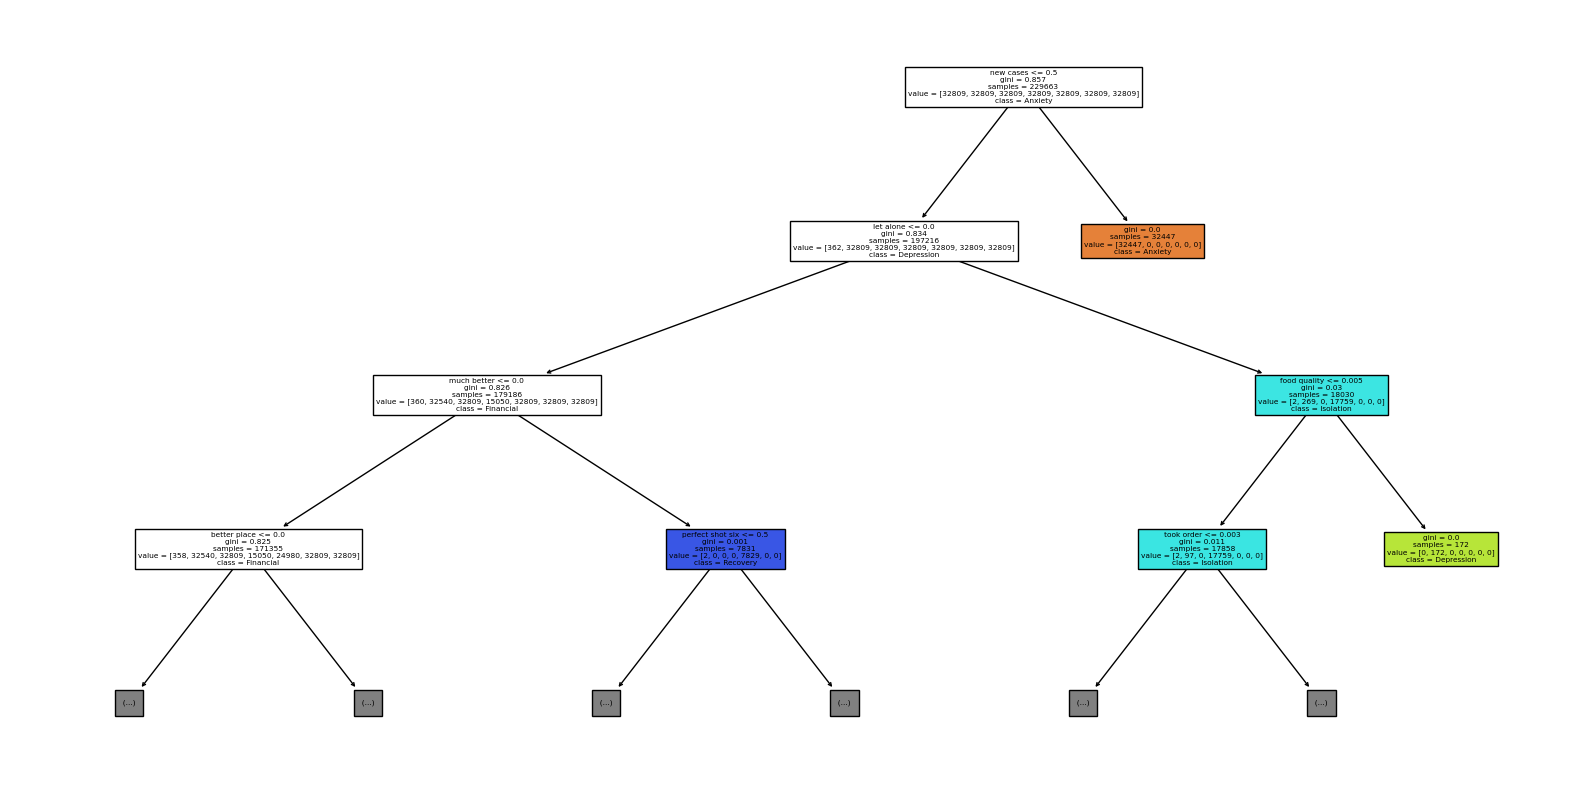

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model, max_depth=3, feature_names=feature_names, class_names=model.classes_, filled=True)
plt.show()

### SVM

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
sentiment_mapping = {'neutral': 0,'Anxiety': 1,'Work': 2,'Recovery': 3,'Financial': 4,'Depression': 5,'Isolation': 6}
filtered_nj['label_sentiment_num'] = filtered_nj['label_sentiment'].map(sentiment_mapping)

In [ ]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_prepared, filtered_nj['label_sentiment'], test_size=0.2, random_state=1234)

scaler = StandardScaler(with_mean=False)
svd = TruncatedSVD(n_components=100, random_state=1234)
svm_model = SVC(kernel='linear')
pipeline = make_pipeline(scaler, svd, svm_model)
pipeline.fit(X_train_svm, y_train_svm)

In [ ]:
y_pred_svm = pipeline.predict(X_test_svm)
print(classification_report(y_test_svm, y_pred_svm))

              precision    recall  f1-score   support

     Anxiety       0.99      0.99      0.99      8176
  Depression       0.00      0.00      0.00        68
   Financial       0.00      0.00      0.00        52
   Isolation       0.00      0.00      0.00        14
    Recovery       0.00      0.00      0.00       127
        Work       0.00      0.00      0.00        83
     neutral       0.67      0.96      0.79       852

    accuracy                           0.95      9372
   macro avg       0.24      0.28      0.25      9372
weighted avg       0.93      0.95      0.94      9372



In [ ]:
accuracy = accuracy_score(y_test_svm, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.9501707212974818


In [ ]:
#lemmatized

In [ ]:
svd = TruncatedSVD(n_components=100, random_state=1234)
svd.set_params(algorithm='arpack')
scaler = StandardScaler(with_mean=False, with_std=False)

svm_model = SVC(kernel='linear')
pipeline = make_pipeline(scaler, svd, svm_model)
pipeline.fit(X_prepared,y_dt)

Pipeline(steps=[('standardscaler',
                 StandardScaler(with_mean=False, with_std=False)),
                ('truncatedsvd',
                 TruncatedSVD(algorithm='arpack', n_components=100,
                              random_state=1234)),
                ('svc', SVC(kernel='linear'))])

In [ ]:
y_pred_svm = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9529449423815621
              precision    recall  f1-score   support

     Anxiety       1.00      0.99      0.99      8176
  Depression       0.00      0.00      0.00        68
   Financial       0.00      0.00      0.00        52
   Isolation       0.00      0.00      0.00        14
    Recovery       0.00      0.00      0.00       127
        Work       0.00      0.00      0.00        83
     neutral       0.66      1.00      0.79       852

    accuracy                           0.95      9372
   macro avg       0.24      0.28      0.26      9372
weighted avg       0.93      0.95      0.94      9372



In [ ]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(ngrams_lemm_vec, filtered_nj['label_sentiment'], test_size=0.2, random_state=1234)

scaler = StandardScaler(with_mean=False)
svd = TruncatedSVD(n_components=100, random_state=1234)
svm_model = SVC(kernel='linear')
pipeline = make_pipeline(scaler, svd, svm_model)
pipeline.fit(X_train_svm,y_train_svm)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('truncatedsvd',
                 TruncatedSVD(n_components=100, random_state=1234)),
                ('svc', SVC(kernel='linear'))])

In [ ]:
y_pred_svm = pipeline.predict(X_test_svm)
accuracy = accuracy_score(y_test_svm, y_pred_svm)
print("Accuracy:", accuracy)
print(classification_report(y_test_svm, y_pred_svm))

Accuracy: 0.950277422108408
              precision    recall  f1-score   support

     Anxiety       0.99      0.99      0.99      8176
  Depression       0.00      0.00      0.00        68
   Financial       0.00      0.00      0.00        52
   Isolation       0.00      0.00      0.00        14
    Recovery       0.00      0.00      0.00       127
        Work       0.00      0.00      0.00        83
     neutral       0.67      0.97      0.79       852

    accuracy                           0.95      9372
   macro avg       0.24      0.28      0.25      9372
weighted avg       0.93      0.95      0.94      9372



In [ ]:
feature_names = tfidf_vec_lemmatized.get_feature_names_out()

top_feature_indices = svd.components_[0].argsort()[::-1][:10]

top_features = [feature_names[i] for i in top_feature_indices]
print("Top 10 features:", top_features)

Top 10 features: ['fear doctor', 'care treatment', 'late outbreak', 'low rate', 'post use', 'dip best', 'announce new', 'pandemic safe', 'beautiful also', 'try outside']


### Clustering with svd

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

svd = TruncatedSVD(n_components=100)
tfidf_svd = svd.fit_transform(ngrams_lemm_vec)

# Normalize the SVD-transformed data
tfidf_normalized = StandardScaler(with_mean=False).fit_transform(tfidf_svd)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(tfidf_normalized)


In [ ]:
clusters

array([ 0,  1,  1, ..., -1, -1, -1], dtype=int64)

In [ ]:
noisy_texts_count = len([j for j in range(len(texts)) if clusters[j] == -1])
print(f"Number of Noisy Texts: {noisy_texts_count}")

Number of Noisy Texts: 1831


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(tfidf_normalized, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(tfidf_normalized, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(tfidf_normalized, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")


Silhouette Score: 0.7493306103432728
Calinski-Harabasz Index: 1964.3592737146191
Davies-Bouldin Index: 0.8949719499009723


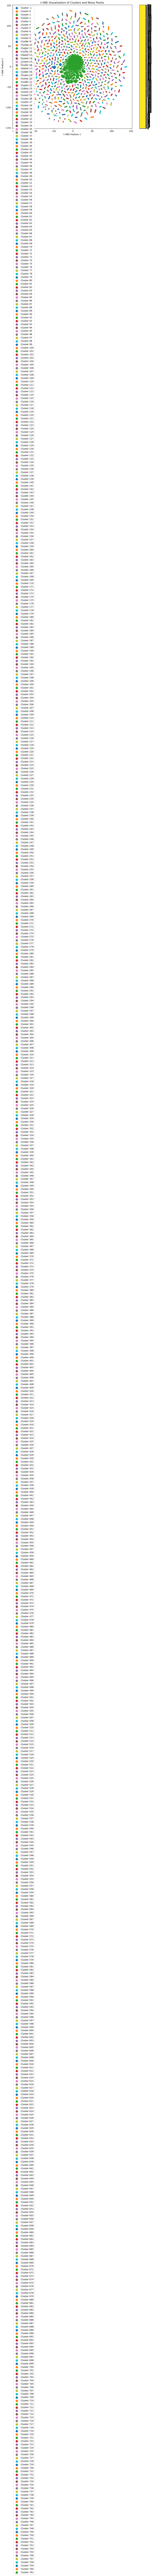

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

tsne = TSNE(n_components=2, random_state=42)
tfidf_tsne = tsne.fit_transform(tfidf_normalized)

plt.figure(figsize=(12, 10))
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    cluster_idx = clusters == cluster
    plt.scatter(tfidf_tsne[cluster_idx, 0], tfidf_tsne[cluster_idx, 1], label=f'Cluster {cluster}', cmap='viridis', s=10)

plt.colorbar(boundaries=np.arange(len(unique_clusters)+1)-0.5).set_ticks(np.arange(len(unique_clusters)))
plt.title('t-SNE Visualization of Clusters and Noisy Points')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(markerscale=3)
plt.show()


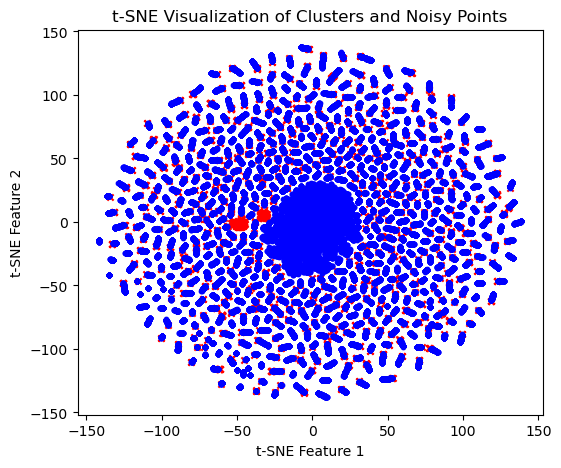

In [ ]:
plt.figure(figsize=(6,5))
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    if cluster == -1:
        plt.scatter(tfidf_tsne[clusters == cluster, 0], tfidf_tsne[clusters == cluster, 1], label='Noisy Points', color='red', s=20, marker='x')
    else:
        plt.scatter(tfidf_tsne[clusters == cluster, 0], tfidf_tsne[clusters == cluster, 1], color='blue', s=10)

plt.title('t-SNE Visualization of Clusters and Noisy Points')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [ ]:
import logging
import re

logging.basicConfig(filename='cluster_log.txt', level=logging.INFO)

for idx, text in enumerate(texts):
    # Replace or remove non-ASCII characters
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', text)

    if clusters[idx] == -1:  # Log only if the text is noisy
        logging.info(f"Noisy Text {idx}: {cleaned_text[:100]}...")  # Log the first 100 characters

    if clusters[idx] == 10:  # Log the 10th text in the 10th cluster
        logging.info(f"Text in 10th Cluster: {cleaned_text}")


In [ ]:
# The output of DBSCAN includes cluster assignments for each data point. Points labeled as -1 are considered as noise points that do not belong
# to any cluster. Noise points might be associated with certain features that are less important or have higher variance.